In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cPickle as pickle

In [ ]:
Ldf_17 = pd.read_csv('~/data/wasser_jacksonvill_2016_2017.csv',parse_dates=['Calendar day'], thousands=',')
Ldf_16 = pd.read_csv('~/data/wasser_jacksonvill_2015_2016.csv',parse_dates=['Calendar day'], thousands=',')
Ldf_15 = pd.read_csv('~/data/wasser_jacksonvill_2014_2015.csv',parse_dates=['Calendar day'], thousands=',')

In [6]:
def group_by_materal(df):
    '''Reformat DataFrame so that order date is by row and item is by column.  
    Values are total quantity ordered for that item on that day
    
    input pandas DataFrame 
    output pandas DataFrame'''
    
    df = df[['Calendar day','Material','Order Qty']]
    df = df.groupby(by = ['Calendar day','Material'])['Order Qty'].sum()
    df = df.unstack()
    df.fillna(0, inplace=True)
    df.columns = df.columns.droplevel()
    return df

def remove_columns(df, x=2000 ):
    '''Remove columns with less then x orders to minimize data to analize.'''
    
    df.columns = df.columns.droplevel()
    sums = df.sum(axis=0)
    sums_drop = sums[sums < x]
    d = list(sums_drop.index)
    df1 = df.drop(d, axis=1)
    return df1

In [ ]:
df = Ldf_17
df = df.append(Ldf_16,ignore_index=True)
df = df.append(Ldf_15,ignore_index=True)

In [ ]:
Gdf = group_by_materal(df)

In [ ]:
####
#Save full dataframe to pickle file
df.to_pickle('/home/ubuntu/data/jacksonville_2014_2017.pkl')

In [3]:
df = pd.read_pickle('/home/ubuntu/data/jacksonville_2014_2017.pkl')

In [5]:
# Find most ordered items
df.Material.value_counts()[0:10]

135330    3168
113266    3063
620100    2824
112390    2816
113172    2653
653100    2606
412501    2591
290000    2548
136289    2427
289900    2305
Name: Material, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fba248a4250>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fba30338310>], dtype=object)

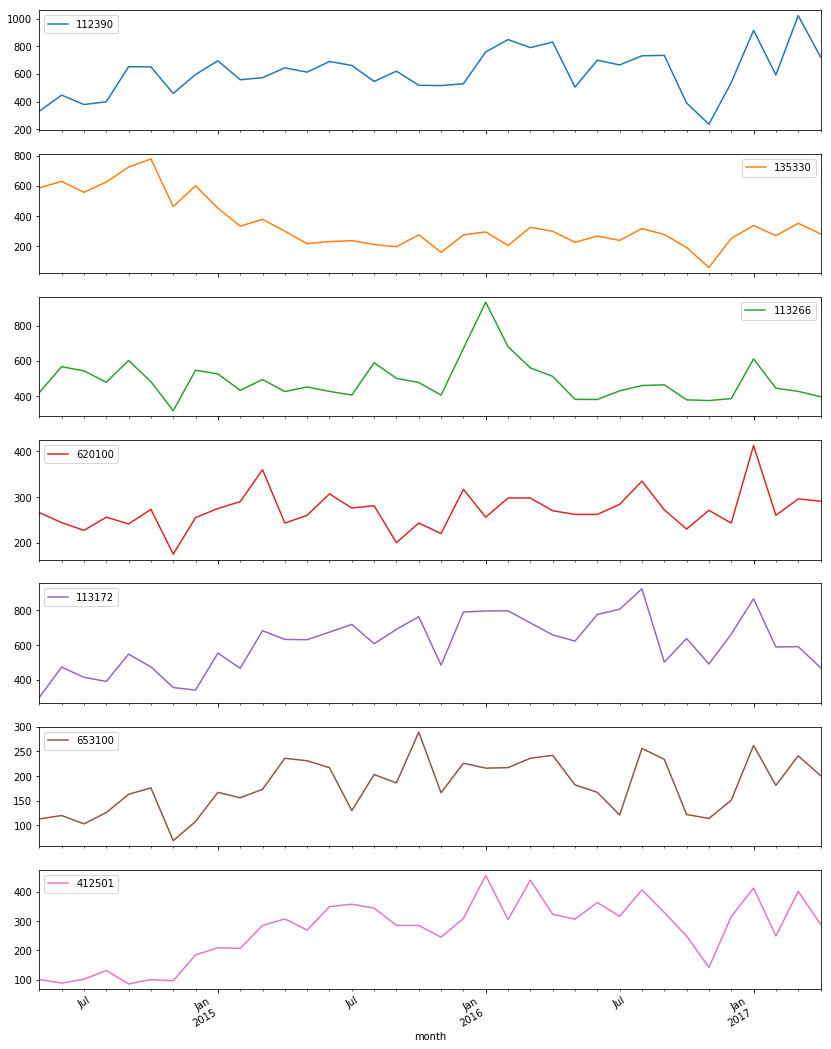

In [10]:
#Plot looking for trends in the data
Gdf[['112390','135330', '113266', '620100', '113172', '653100', '412501']].resample('M').plot(subplots=True, figsize = (14,20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fba301400d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fba211a6b90>], dtype=object)

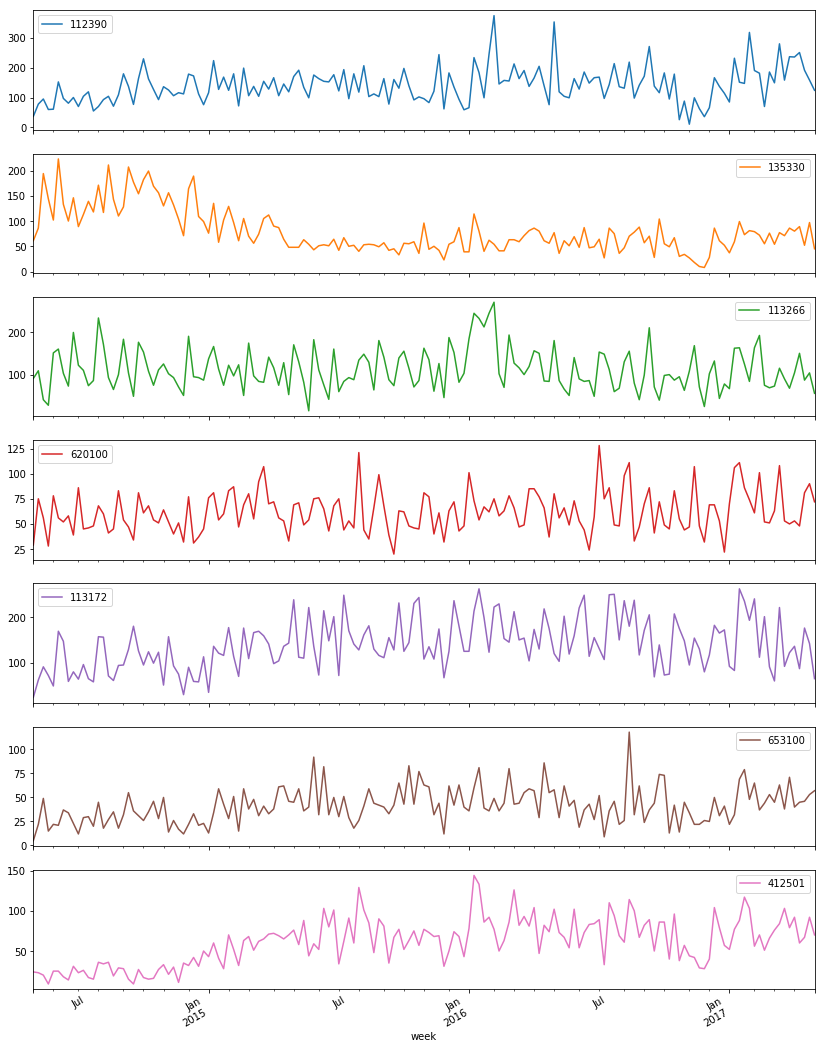

In [11]:
Gdf[['112390','135330', '113266', '620100', '113172', '653100', '412501']].resample('W').plot(subplots=True, figsize = (14,20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fba2e605c50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fba1adfa190>], dtype=object)

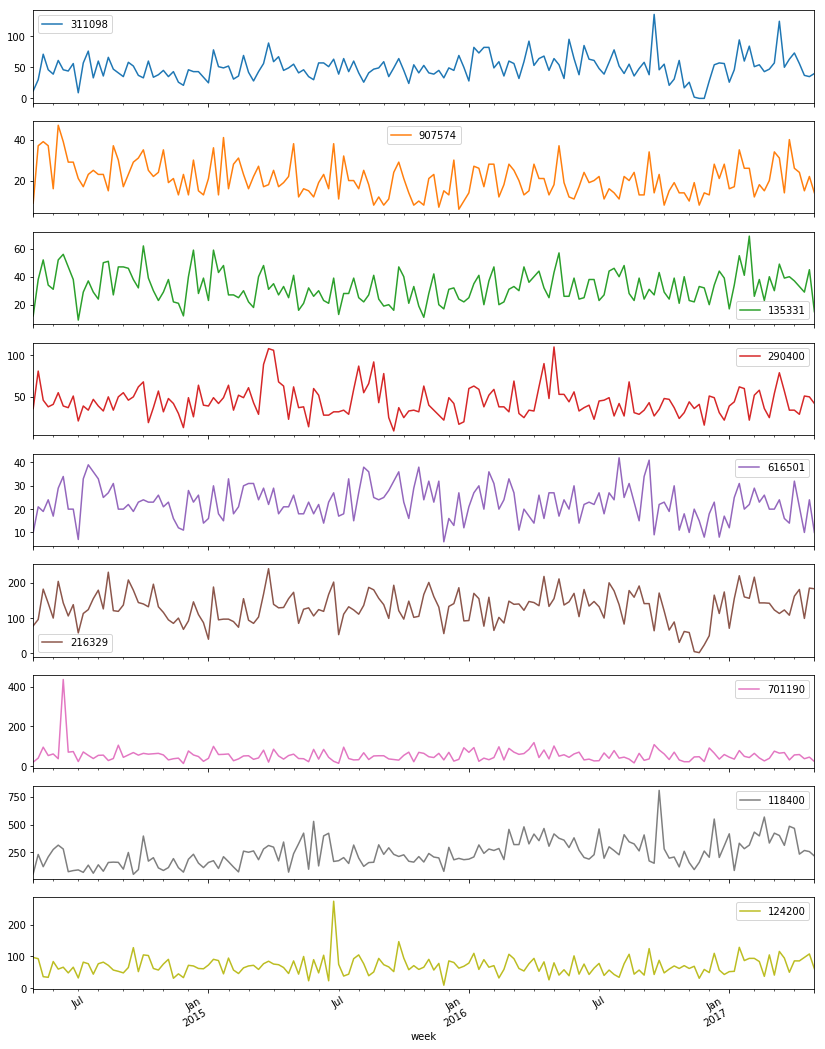

In [12]:

Gdf[['311098','907574','135331','290400','616501','216329','701190','118400','124200']].resample('W').plot(subplots=True, figsize = (14,20))
